In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, Conv1D, AveragePooling1D
from keras.utils import *
from keras.optimizers import *


Using TensorFlow backend.


In [2]:
data=np.asarray(pd.read_csv('Xn',header=None))
y=np.asarray(pd.read_csv('y',header=None))
Y=y.T
X_train, x_test, y_train, Y_test = train_test_split(data.T,y, test_size=0.2, random_state=42)
X_valid=x_test[:100]
X_test=x_test[100:]
y_valid=Y_test[:100]
y_test=Y_test[100:]
X_train = X_train.reshape(-1, 1000,1)
X_valid=X_valid.reshape(-1,1000,1)
X_test  = X_test.reshape(-1, 1000, 1)
y_train = y_train.reshape(-1, 1, 1)
y_valid=y_valid.reshape(-1,1,1)
y_test = y_test.reshape(-1, 1, 1)


In [3]:
model=Sequential()
model.add(Conv1D(128, 20 , strides=1,input_shape=(1000,1)))
model.add(AveragePooling1D(pool_size=32))
model.add(Conv1D(64, 20,strides=1))
model.add(AveragePooling1D(pool_size=10))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy', metrics=['accuracy'])
# model_history=model.fit(X_train,y_train,epochs=150,batch_size=100,validation_data=(X_valid,y_valid))


W1117 18:51:10.459312 10328 deprecation_wrapper.py:119] From C:\Users\OMKAR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1117 18:51:10.489232 10328 deprecation_wrapper.py:119] From C:\Users\OMKAR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1117 18:51:10.493222 10328 deprecation_wrapper.py:119] From C:\Users\OMKAR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1117 18:51:10.526133 10328 deprecation_wrapper.py:119] From C:\Users\OMKAR\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W1117 18:51:10.813760 10328 deprecation_wrapper.py:119] From C:\Users\OMKAR\Ana

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 981, 128)          2688      
_________________________________________________________________
average_pooling1d_1 (Average (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            163904    
_________________________________________________________________
average_pooling1d_2 (Average (None, 1, 64)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 128)            8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1, 64)             8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1, 16)             1040      
__________

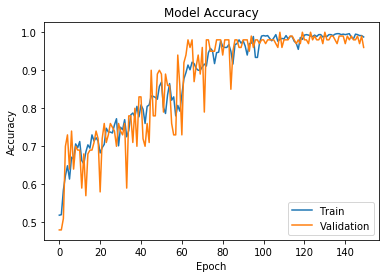

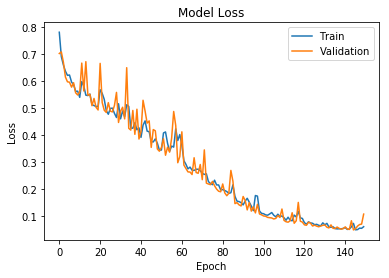

In [4]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
# plt.savefig('accHigh.svg')

# # Plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
# plt.savefig('lossHigh.svg')

In [5]:
y_pred = model.predict(X_test)
y_p=[0 for i in range(100)]
for i in range (100):
    if(y_pred[i]>0.5):
        y_p[i]=1
    


In [6]:
a=0
for i in range(100):    
        if y_test[i] == y_p[i]:
            a=a+1 
a/100            

0.93